<a href="https://colab.research.google.com/github/Fa-commits/BINA/blob/main/BINA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ökonomische Auswirkungen von SBB-Immobilienprojekten auf Städte und Gemeinden

![Titelbild](/content/drive/MyDrive/ColabNotebooks/Titelbild.jpg)



---



# MSc Wirtschatsinformatik

**Business Intelligence & analysics** (BINA FS 2021)

Eingereicht am xx. Juni 2025 durch:

* Fabian Beutler, 3661 Uetendorf, fabian.beutler@students.bfh.ch
* Matteo Ciurlia, 4500 Solothurn, matteo.ciurlia@students.bfh.ch
* Björn Rindlisbacher, 3705 Faulensee, bjoern.rindlisbacher.2@students.bfh.ch
* Tim Zürcher, 3705 Faulensee, tim.zuercher@students.bfh.ch



---



# Inhaltsverzeichnis

>[Ökonomische Auswirkungen von SBB-Immobilienprojekten auf Städte und Gemeinden](#scrollTo=eGLjdDgnu2kU)

>[MSc Wirtschatsinformatik](#scrollTo=hzQiX8g70MNU)

>[Inhaltsverzeichnis](#scrollTo=R_2Ky16MzPgb)

>[Pre-Requirements](#scrollTo=eeyOLg30fJV-)

>[Einleitung & Kontext](#scrollTo=zlrICcRy3Ob5)

>[Ziel und Informationsbedarf definieren](#scrollTo=dlO9UYuQ9ZAF)

>[Datensammlung](#scrollTo=RG9Jh63y3YrO)

>>[3.1 Datenquellen](#scrollTo=RG9Jh63y3YrO)

>>[3.2 Datenqualität](#scrollTo=RG9Jh63y3YrO)

>>[3.3 Datenbereinigung](#scrollTo=RG9Jh63y3YrO)

>>[3.4 Datenmodellierung](#scrollTo=RG9Jh63y3YrO)

>[Datenimport & Vorbereitung](#scrollTo=-Ub6attm3KGO)

>>[4.1 Bibliotheken laden](#scrollTo=-Ub6attm3KGO)

>>[4.2 Verbindung zu Google Drive](#scrollTo=JKsqN9fUC51b)

>>[4.3 Datensatz BFS: Beschäftigung nach Gemeinden](#scrollTo=fg6yWMyUCrbn)

>>[4.4 Datensatz SBB: Immobilienprojekte](#scrollTo=qyZOO0pyCbTe)

>>[4.5 Datensatz BFS: Unternehmensgründungen nach Gemeinde](#scrollTo=jprLBRZ1yg_v)

>>[4.5 Verknüpfung der Datensätze über BFS_ID](#scrollTo=X4G3_ya9FazY)

>[5 Daten analysieren](#scrollTo=M69eTxW8mNGo)

>>[5.1 Haben Gemeinden mit SBB-Projekten im Zeitraum 2011–2022 ein signifikant stärkeres Beschäftigungswachstum als vergleichbare Gemeinden ohne solche Projekte?](#scrollTo=4V1u4vVpWxah)

>>>[5.1.1 Beschäftigungswachstum 2011–2022 berechnen](#scrollTo=7qHqtRqallvs)

>>>[5.1.2 Vergleich mit Boxplot](#scrollTo=j-d2nawKt5j_)

>>>[5.1.3 Geografische Visualisierung der Beschäftigungsentwicklung mit Hervorhebung von SBB-Projektgemeinden in der Schweiz](#scrollTo=0Re5yvCXxGQx)

>>>[5.1.4 T-Test zur Signifikanzprüfung des Beschäftigungswachstums zwischen Gruppen](#scrollTo=VUnC79WOu3Xc)

>>[5.2 Gibt es Anzeichen dafür, dass SBB-Investitionen die Standortattraktivität für Unternehmen erhöhen?](#scrollTo=QEJN8IaMXDFR)

>>[5.3 Inwieweit verändern sich Mietpreise oder die Nachfrage nach Büro- und Gewerbeflächen in Projektgemeinden?](#scrollTo=Qbibd6eWXIO6)

>>[5.4 Welche wirtschaftlichen Branchen profitieren besonders stark von den Immobilienprojekten?](#scrollTo=vQVq6WvtXJij)

>>[5.5 Können aus den analysierten Daten Empfehlungen für Gemeinden, Investoren oder die SBB selbst abgeleitet werden?](#scrollTo=yIjDE9MJXK43)

>>>[Import des Datensatzes](#scrollTo=vV1jHmeA55cJ)

>>>[Analyse des Datensat 1](#scrollTo=V1sDpR9G70pS)

>>[Berechnung der Differenzen](#scrollTo=_HS51JSROzLO)

>>[Erstellen der Schweizerkarte der Differenzent zwischen 2011 und 2022](#scrollTo=E7JQGTjc6esb)

>[Diskussion der Ergebnisse](#scrollTo=Uj55MKRw_ckP)

>[Präsentation der Ergebnisse](#scrollTo=3S6_B7LV_mgR)

>[Fazit](#scrollTo=Dj-mUqBUmkzs)

>[Schlusswort](#scrollTo=mWKPHCCjmoxb)





---



# Pre-Requirements


In [1]:
import pandas as pd
import requests
import itertools
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize, TwoSlopeNorm, LogNorm
import numpy as np
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#  Verbindung zum Google-Drive für Geojson-Datei. Muss jeder selbst verbinden.

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#1. Einleitung & Kontext

In einer zunehmend urbanisierten und vernetzten Gesellschaft gewinnen Infrastruktur- und Immobilienentwicklungen an strategischer Bedeutung für die wirtschaftliche Entwicklung von Städten und Gemeinden. Die Schweizerischen Bundesbahnen (SBB) leisten mit ihren Immobilienprojekten – insbesondere im Umfeld von Bahnhöfen – nicht nur Beiträge zur Verdichtung und zur funktionalen Transformation urbaner Räume, sondern könnten auch direkte und indirekte ökonomische Effekte auslösen.

Diese Arbeit untersucht, ob und inwiefern Investitionen der SBB in Immobilienprojekte mit einer positiven Entwicklung lokaler Wirtschaftsindikatoren verbunden sind. Im Zentrum steht die Frage, ob sich solche Projekte messbar auf die Anzahl der Arbeitsplätze, die Nachfrage nach Gewerbeflächen, Mietpreise, Steuereinnahmen sowie die Standortattraktivität für Unternehmen auswirken.

Vor dem Hintergrund kommunaler Planungshoheit und zunehmender wirtschaftlicher Konkurrenz unter Städten soll diese Arbeit datenbasierte Entscheidungsgrundlagen liefern. Im Fokus steht die quantitative Analyse von Gemeinden mit und ohne SBB-Projekt im Zeitraum 2011–2022. Ergänzt werden die Analysen durch eine geografische Visualisierung und explorative Vergleiche.

#2. Ziel und Informationsbedarf definieren

In einer urbanisierten Gesellschaft mit zunehmendem Druck auf Flächen, Mobilität und Infrastruktur gewinnen strategische Immobilieninvestitionen an Bedeutung. Die SBB realisiert in zahlreichen Städten und Gemeinden Immobilienprojekte im Umfeld von Bahnhöfen, die potenziell wirtschaftliche Veränderungen in den betroffenen Regionen auslösen. Dazu zählen neue Arbeitsplätze, veränderte Standortattraktivität, höhere Mietpreise sowie mögliche Verschiebungen in der Gewerbenutzung.

Ziel dieser Arbeit ist es, systematisch zu analysieren, ob solche SBB-Projekte messbare Auswirkungen auf die wirtschaftliche Entwicklung von Schweizer Gemeinden haben. Dabei soll nicht nur die absolute Veränderung der Beschäftigtenzahlen betrachtet werden, sondern auch die Wirkung auf spezifische Sektoren, Mietniveaus und Unternehmensdynamiken.

Folgende zentrale Schüsselfragen werden untersucht:

* Haben Gemeinden mit SBB-Projekten im Zeitraum 2011–2022 ein signifikant stärkeres Beschäftigungswachstum als vergleichbare Gemeinden ohne solche Projekte?

* Gibt es Anzeichen dafür, dass SBB-Investitionen die Standortattraktivität für Unternehmen erhöhen?

* Inwieweit verändern sich Mietpreise oder die Nachfrage nach Büro- und Gewerbeflächen in Projektgemeinden?

* Welche wirtschaftlichen Branchen profitieren besonders stark von den Immobilienprojekten?

* Können aus den analysierten Daten Empfehlungen für Gemeinden, Investoren oder die SBB selbst abgeleitet werden?

Um diese Fragen zu beantworten, wird ein datengestützter Analyseansatz verfolgt, der öffentlich zugängliche Quellen mit geografischen, statistischen und explorativen Methoden kombiniert. Die daraus gewonnenen Erkenntnisse sollen Gemeinden in ihrer Infrastruktur- und Standortentwicklung unterstützen.

#3. Datensammlung
Nachfolgend wird aufgezeigt, wie die für die Untersuchung benötigten Daten gesammelt und für die Auswertung überprüft, bereinigt und organisiert wurden.

##3.1 Datenquellen

Die Untersuchung basiert auf drei zentralen Datenquellen:

* Bundesamt für Statistik (BFS): Vollzeitäquivalente pro Gemeinde von 2011 bis 2022, differenziert nach Jahr und Wirtschaftssektor. Diese Daten wurden über die offizielle PX-Web API bezogen. [BFS - Arbeitsstätten und Beschäftigte nach Gemeinde und Wirtschaftssektor](https://www.bfs.admin.ch/bfs/de/home/statistiken/kataloge-datenbanken.assetdetail.32159099.html)

* SBB Open Data: Informationen zu aktuellen und geplanten Immobilienprojekten inklusive Ortsangabe, Baujahr und Projektstatus. Die Daten wurden als CSV-Datei von der Plattform data.sbb.ch bezogen und anschliessend bereinigt. [SBB - Immobilienprojekte](https://data.sbb.ch/explore/dataset/bauprojekte-immobilien/information)

* swissBOUNDARIES3D (Swisstopo): Geodaten aller Schweizer Gemeinden, bereitgestellt als GeoPackage. Diese wurden zur geografischen Visualisierung der Analyseergebnisse genutzt. [swissBOUNDARIES3D - administrativen Einheiten und Grenzen der Schweiz 2025](https://www.swisstopo.admin.ch/de/landschaftsmodell-swissboundaries3d)

* BFS Unternehmensstatistik: Neugründungen von Unternehmen pro Gemeinde und Jahr im sekundären und tertiären Sektor von 2013 bis 2022. Diese Daten wurden ebenfalls über die PX-Web API bezogen. [BFS - Unternehmensgründungen nach Gemeinde](https://www.bfs.admin.ch/bfs/de/home/statistiken/industrie-dienstleistungen/unternehmen-beschaeftigte/unternehmensdemografie/neugruendungen-ueberlebensraten.assetdetail.32846430.html)

* Bevölkerungswachstum (BFS-Daten, 2011–2022):
Die Bevölkerungsentwicklung einer Gemeinde kann ein wichtiger Faktor für wirtschaftliche Dynamik und Unternehmensgründungen sein. Hierfür werden Daten des Bundesamts für Statistik (BFS) zur Bevölkerungszahl auf Gemeindeebene für die Jahre 2011 und 2022 herangezogen. [BFS - Demografische Bilanz nach institutionellen Gliederungen](https://www.bfs.admin.ch/asset/de/px-x-0102020000_201)

##3.2 Datenqualität

Für die Analyse wurden vier unterschiedliche, öffentlich zugängliche Datenquellen herangezogen, die sowohl strukturierte statistische Informationen als auch geografische Merkmale beinhalten.

* Die erste und zugleich wichtigste Quelle stammt vom Bundesamt für Statistik (BFS) und umfasst Daten zu Beschäftigtenzahlen in Vollzeitäquivalenten (FTE) pro Gemeinde, aufgeschlüsselt nach Wirtschaftssektor, für den Zeitraum 2011 bis 2022. Diese Daten sind über die PX-Web-API standardisiert zugänglich und zeichnen sich durch eine hohe Qualität und landesweite Vollständigkeit aus. Sie dienen als quantitatives Fundament für die Erhebung wirtschaftlicher Entwicklung auf lokaler Ebene.

* Die zweite Quelle umfasst ebenfalls PX-Web-Daten des BFS, diesmal jedoch zum Thema Unternehmensdemografie. Sie enthält Angaben zu Unternehmensneugründungen im sekundären und tertiären Sektor für den Zeitraum 2013 bis 2022. Die Struktur entspricht jener der FTE-Daten, was eine direkte Vergleichbarkeit und spätere Integration ermöglicht. Auch diese Daten sind vollständig und flächendeckend verfügbar.

* Als dritte Datenquelle dienen unstrukturierte JSON-Daten der SBB zu Immobilien- und Bauprojekten. Die rund 200 Projekte variieren stark hinsichtlich Vollständigkeit und Detailtiefe: Während einige über genaue Zeitangaben und geografische Einordnung verfügen, fehlen in anderen Fällen Informationen zum Projektstatus oder der Ortsangabe. Diese Heterogenität stellt besondere Anforderungen an die Datenbereinigung.

* Die vierte Quelle ist das GeoPackage „swissBOUNDARIES3D“ von Swisstopo, welches die geometrischen Umrisse und Eigenschaften aller politischen Gemeinden der Schweiz im Jahr 2025 beinhaltet. Die Datei umfasst 6698 räumliche Objekte mit präziser Topologie, allerdings ohne direkt zuordenbare Gemeindebezeichnungen oder Postleitzahlen. Dies macht eine externe Referenzierung – beispielsweise über die BFS-Gemeinde-ID – notwendig.

* Die fünfte Quelle ist das Bevölkerungswachstum nach Gemeinde. Die Daten zur Bevölkerungsänderung stammen direkt von der BFS-API und decken den Zeitraum von 2011 bis 2022 ab. Sie basieren auf den offiziellen statistischen Meldungen der Gemeinden und enthalten die jährlichen Veränderungen.

##3.3 Datenbereinigung

Die Datenbereinigung erfolgte datenquellenspezifisch, wobei das Ziel stets die Harmonisierung der Gemeindebezeichnungen sowie die Standardisierung zeitlicher und sektoraler Dimensionen war. Folgende Bereinigung wurden durchgeführt:

* Bei den FTE-Daten wurden ausschliesslich Beobachtungseinheiten des Typs „Vollzeitäquivalente“ berücksichtigt. Die Daten wurden auf die Jahre 2011 und 2022 gefiltert, die Werte aggregiert und die Differenz zur Ermittlung der Entwicklung auf Gemeindeebene berechnet. Gleichzeitig wurden die Gemeindebezeichnungen vereinheitlicht (z. B. Kleinbuchstaben, Entfernung von Sonderzeichen), um eine spätere Verknüpfung zu ermöglichen.

* Für die Unternehmensgründungsdaten erfolgte eine Filterung auf den Zeitraum 2013–2022 sowie auf die relevante Beobachtungseinheit „Neugründungen“. Danach wurden die Daten pro Gemeinde aufsummiert, strukturell an die FTE-Daten angepasst und hinsichtlich der Ortsnamen ebenfalls standardisiert.

* Die SBB-Projektdaten stellten die grösste Herausforderung dar: Da keine strukturierte Georeferenzierung vorlag, wurden Ortsnamen extrahiert, normalisiert und für die Zeiträume 2011 bis 2022 entsprechend gefiltert. Ein Binärindikator „Hat_SBB_Projekt“ wurde pro Gemeinde erstellt, wobei Gemeinden mit mindestens einem Projekt im Untersuchungszeitraum als „True“ klassifiziert wurden. Aufgrund uneinheitlicher Ortsangaben war in einzelnen Fällen ein unscharfes Matching notwendig.

* Für die Geo-Komponente wurden aus swissBOUNDARIES3D nur jene Geometrien extrahiert, die als politische Gemeinden klassifiziert sind. Die Geometrien wurden in das Koordinatensystem WGS84 transformiert, um eine spätere Darstellung im Web oder via GIS-Systeme zu ermöglichen. Da keine Gemeindebezeichnungen enthalten waren, wird eine externe ID-basierte Verknüpfung über die BFS-Gemeindenummer vorgesehen.

##3.4 Datenmodellierung

Nach der Zusammenführung und Bereinigung der einzelnen Datenquellen wurde das finale Datenmodell in Form eines Entity-Relationship-Diagramms (ERD) strukturiert. Ziel der Modellierung war es, eine möglichst klare Trennung der verschiedenen Datenbereiche (Zeit, Raum, Unternehmen, Projekte, Beschäftigung) zu erreichen und zugleich die logischen Beziehungen zwischen diesen Entitäten effizient abzubilden.

Die modellierte Datenbank umfasst fünf zentrale Tabellen:

* Gemeinde: Enthält alle raumbezogenen Informationen auf Ebene der politischen Gemeinde inklusive des BFS-Codes, des Kantons sowie der Geometrie.

* SBB_Bauprojekte: Enthält projektspezifische Informationen zu Bauvorhaben der SBB, darunter Projekttitel, Typ, Laufzeit sowie Geokoordinaten. Diese Tabelle ist über den BFS-Code mit der Gemeinde verknüpft.

* Unternehmen: Beinhaltet strukturierte Informationen zu aktiven Unternehmen, Neugründungen und Schliessungen. Neben dem BFS-Code ist hier auch das Jahr und die betroffene Beobachtungseinheit enthalten.

* FTE: Enthält Angaben zu Vollzeitäquivalenten nach Branche und Jahr, ebenfalls über den BFS-Code verknüpft.

* Zeitdimension: Dient zur Normierung und Referenzierung der Jahresangaben und ermöglicht eine saubere zeitliche Analyse der Entwicklungen.

* Bevölkerungswachstum: Dient als weitere Variable zur Validierung der Zusammenhänge um den effektiven Impact der SBB-Bauten genauer zu identifizieren oder einen Zusammenhang auszuschliessen.

Abbildung 2 (ERD) zeigt das daraus resultierende Entity-Relationship-Diagramm (ERD), welches die logischen Beziehungen zwischen den einzelnen Tabellen visualisiert. Die Gemeinde-Tabelle steht dabei im Zentrum und dient als verbindendes Element zwischen den übrigen Tabellen über den eindeutigen BFS_ID (Primärschlüssel).

Die Zeitdimension ist sowohl mit der FTE- als auch mit der Unternehmenstabelle verbunden und ermöglicht eine konsistente zeitliche Analyse entlang eines definierten Kalenderjahrs. Somit wird sichergestellt, dass sowohl strukturierte Beschäftigungsdaten als auch projektspezifische Informationen (z. B. Start- und Enddatum) eindeutig zeitlich verortet werden können.

Die Datenbankstruktur wurde so gewählt, dass Redundanz vermieden und gleichzeitig eine hohe Abfrageeffizienz für spätere Analysen sichergestellt wird.

![ERD](https://github.com/Fa-commits/BINA/blob/main/ERD_Datasets_BINA.drawio.png?raw=1)

Farblegende zur Abbildung 2:

* Blau: Gemeinde

* Lila: Zeitdimension

* Grün: Unternehmensdaten

* Rot: Beschäftigungsdaten (FTE)

* Gelb: Bauprojekte der SBB

Die genaue Struktur und Attributierung der einzelnen Tabellen kann der grafischen Darstellung in Abbildung 2 entnommen werden.

#4. Datenimport & Vorbereitung

##4.1 Bibliotheken laden

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import matplotlib.cm as cm
import matplotlib.colorbar as cbar
import requests
import itertools
from matplotlib.colors import TwoSlopeNorm
from scipy.stats import ttest_ind

##4.2 Verbindung zu Google Drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##4.3 Datensatz BFS: Beschäftigung nach Gemeinden

Dieser Datensatz stammt vom Bundesamt für Statistik (BFS) und enthält Informationen zur Anzahl
der Beschäftigten (Vollzeitäquivalente) in allen Schweizer Gemeinden, gegliedert nach Jahr,
Beobachtungseinheit und Wirtschaftssektor.

- **Zeitraum**: 2011 und 2022
- **Beobachtungseinheit**: Gemeinden
- **Wirtschaftssektor**: Gesamtheit aller Sektoren (Code „999“)
- **Indikator**: Anzahl Vollzeitäquivalente pro Gemeinde

Diese Daten dienen als Grundlage für die Analyse der wirtschaftlichen Entwicklung von Gemeinden
im Vergleich zwischen 2011 und 2022.


In [3]:
# --- Funktion zum Abrufen der BFS-Beschäftigungsdaten ---
def fetch_bfs_employment_data():
    url = "https://www.pxweb.bfs.admin.ch/api/v1/de/px-x-0602010000_102/px-x-0602010000_102.px"
    years = [str(y) for y in range(2011, 2023)]
    query = {
        "query": [
            {"code": "Jahr", "selection": {"filter": "item", "values": years}},
            {"code": "Wirtschaftssektor", "selection": {"filter": "item", "values": ["999"]}},
            {"code": "Beobachtungseinheit", "selection": {"filter": "item", "values": ["5"]}}
        ],
        "response": {"format": "json-stat2"}
    }
    response = requests.post(url, json=query)
    return response.json()

# --- Verarbeitung der BFS-Daten ---
def process_bfs_data(raw_data):
    dimensions = ["Jahr", "Gemeinde", "Wirtschaftssektor", "Beobachtungseinheit"]
    df = pd.DataFrame(columns=dimensions + ["Wert"])
    sizes = [len(raw_data["dimension"][dim]["category"]["index"]) for dim in dimensions]

    def prod(iterable):
        result = 1
        for x in iterable:
            result *= x
        return result

    for combo in itertools.product(*[raw_data["dimension"][dim]["category"]["index"].keys() for dim in dimensions]):
        index = 0
        for i, val in enumerate(combo):
            dim_index = int(raw_data["dimension"][dimensions[i]]["category"]["index"][val])
            index += dim_index * prod(sizes[i+1:])
        value = raw_data["value"][index]
        row = dict(zip(dimensions, combo))
        row["Wert"] = value
        df = pd.concat([df, pd.DataFrame([row])], ignore_index=True)

    for dim in dimensions:
        df[dim] = df[dim].map(raw_data["dimension"][dim]["category"]["label"])

    df[['PLZ', 'Ort']] = df['Gemeinde'].str.split(' ', n=1, expand=True)
    df.drop(columns=['Gemeinde'], inplace=True)
    df.dropna(subset=['Ort'], inplace=True)
    df['Wert'] = pd.to_numeric(df['Wert'], errors='coerce')
    return df

# --- Abrufen und Verarbeiten ---
raw_bfs_data = fetch_bfs_employment_data()
df_bfs = process_bfs_data(raw_bfs_data)

print("BFS-Daten geladen:", df_bfs.shape)
print("Zeitraum:", df_bfs['Jahr'].unique())
print("Beispielhafte Gemeinden:", df_bfs['Ort'].drop_duplicates().sample(5).to_list())
print("Anzahl fehlender Werte (FTE):", df_bfs['Wert'].isna().sum())

BFS-Daten geladen: (25740, 6)
Zeitraum: ['2011' '2012' '2013' '2014' '2015' '2016' '2017' '2018' '2019' '2020'
 '2021' '2022']
Beispielhafte Gemeinden: ['Zielebach', 'Güttingen', 'Bülach', 'Ottenbach', 'Coinsins']
Anzahl fehlender Werte (FTE): 12


##4.4 Datensatz SBB: Immobilienprojekte

Dieser Datensatz stammt von der SBB Open Data Plattform (data.sbb.ch) und enthält Informationen
zu aktuellen und geplanten Immobilienprojekten der SBB in der ganzen Schweiz.

- **Projekttypen**: STATIONS, INVESTMENT_OBJECTS etc.
- **Projektstatus**: in Planung, Bauphase, Management etc.
- **Attribute**: Projektname, Ort, Postleitzahl, Phase, Portfolio

Diese Daten erlauben es, Gemeinden mit aktiven SBB-Projekten zu identifizieren,
um deren wirtschaftliche Entwicklung gezielt zu untersuchen.


In [4]:
def load_sbb_projects_csv():
    url = "https://data.sbb.ch/explore/dataset/bauprojekte-immobilien/download/?format=csv"
    df_sbb = pd.read_csv(url, sep=';')
    df_sbb.columns = df_sbb.columns.str.strip().str.lower()
    df_sbb = df_sbb.dropna(subset=['city', 'startofconstruction'])
    df_sbb['startofconstruction'] = pd.to_numeric(df_sbb['startofconstruction'], errors='coerce')
    df_sbb = df_sbb[df_sbb['startofconstruction'].between(2011, 2022)]
    cols = ['titlede', 'city', 'zipcode', 'phase', 'portfolio', 'startofconstruction']
    df_sbb_reduced = df_sbb[cols].copy()
    df_sbb_reduced['Ort_clean'] = df_sbb_reduced['city'].astype(str).str.lower().str.strip()
    return df_sbb_reduced

df_sbb = load_sbb_projects_csv()

print("SBB-Daten geladen:", df_sbb.shape)
print("Zeitraum:", df_sbb['startofconstruction'].min(), "-", df_sbb['startofconstruction'].max())
print("Einzigartige Orte:", df_sbb['Ort_clean'].nunique())
print("Beispielhafte Orte:", df_sbb['Ort_clean'].dropna().unique()[:5])

SBB-Daten geladen: (14, 7)
Zeitraum: 2017.0 - 2022.0
Einzigartige Orte: 10
Beispielhafte Orte: ['morges' 'luzern' 'basel' 'zürich' 'liestal']


##4.5 Datensatz BFS: Unternehmensgründungen nach Gemeinde
Dieser zusätzliche Datensatz des Bundesamts für Statistik ergänzt die Analyse um eine weitere ökonomische Kennzahl: die Anzahl Unternehmensneugründungen. Er enthält jährliche Angaben über die Anzahl neu gegründeter Unternehmen nach Gemeinde und Wirtschaftssektor.

* Zeitraum: 2013–2022

* Beobachtungseinheit: Unternehmensneugründungen (Code „2“)

* Wirtschaftssektoren: Sekundärer und tertiärer Sektor

* Indikator: Anzahl Neugründungen pro Gemeinde und Jahr

Die Daten wurden über die PX-Web API bezogen und in aggregierter Form (Summe über alle Jahre) mit den übrigen Gemeindeinformationen verknüpft. Sie erlauben Rückschlüsse auf die Standortattraktivität von Gemeinden – insbesondere im Vergleich zwischen solchen mit und ohne SBB-Projekt.

In [5]:
url = "https://www.pxweb.bfs.admin.ch/api/v1/de/px-x-0602030000_205/px-x-0602030000_205.px"
query = {
    "query": [
        {"code": "Beobachtungseinheit", "selection": {"filter": "item", "values": ["2"]}},
        {"code": "Wirtschaftssektor", "selection": {"filter": "item", "values": ["2", "3"]}},
        {"code": "Jahr", "selection": {"filter": "item", "values": [str(y) for y in range(2013, 2023)]}}
    ],
    "response": {"format": "json-stat2"}
}
response = requests.post(url, json=query)
raw_data = response.json()

dimensions = ["Jahr", "Gemeinde", "Wirtschaftssektor"]
df = pd.DataFrame(columns=dimensions + ["Wert"])
sizes = [len(raw_data["dimension"][dim]["category"]["index"]) for dim in dimensions]

def prod(iterable):
    result = 1
    for x in iterable:
        result *= x
    return result

for combo in itertools.product(*[raw_data["dimension"][dim]["category"]["index"].keys() for dim in dimensions]):
    index = 0
    for i, val in enumerate(combo):
        dim_index = int(raw_data["dimension"][dimensions[i]]["category"]["index"][val])
        index += dim_index * prod(sizes[i+1:])
    value = raw_data["value"][index]
    row = dict(zip(dimensions, combo))
    row["Wert"] = value
    df = pd.concat([df, pd.DataFrame([row])], ignore_index=True)

for dim in dimensions:
    df[dim] = df[dim].map(raw_data["dimension"][dim]["category"]["label"])

df_gruendungen = df.groupby("Gemeinde", as_index=False)["Wert"].sum()
df_gruendungen['BFS_ID'] = df_gruendungen['Gemeinde'].str.extract(r'^(\d+)').astype(int)
df_gruendungen = df_gruendungen.rename(columns={"Wert": "Gruendungen_2013_2022"})

print("Gründungsdaten geladen:", df_gruendungen.shape)
print("Anzahl BFS_IDs extrahiert:", df_gruendungen['BFS_ID'].notna().sum())
print("Beispiele mit Gründungen:", df_gruendungen.sort_values('Gruendungen_2013_2022', ascending=False).head(5))

Gründungsdaten geladen: (2145, 3)
Anzahl BFS_IDs extrahiert: 2145
Beispiele mit Gründungen:            Gemeinde Gruendungen_2013_2022  BFS_ID
1275    5198 Melide                  6059    5198
1274  5196 Massagno                  5958    5196
1271    5192 Lugano                  5809    5192
1273     5194 Manno                  5604    5194
1272  5193 Magliaso                  5553    5193


### 4.6 Bevölkerungswachstum

In [6]:
url = "https://www.pxweb.bfs.admin.ch/api/v1/de/px-x-0102020000_201/px-x-0102020000_201.px"
query = {
    "query": [
        {"code": "Jahr", "selection": {"filter": "item", "values": [str(y) for y in range(30, 42)]}},
        {"code": "Kanton (-) / Bezirk (>>) / Gemeinde (......)", "selection": {"filter": "item", "values": [str(y) for y in range(1, 2309)]}},
        {"code": "Staatsangehörigkeit (Kategorie)", "selection": {"filter": "item", "values": ["0"]}},  # Total
        {"code": "Geschlecht", "selection": {"filter": "item", "values": ["0"]}},  # Total
        {"code": "Demografische Komponente", "selection": {"filter": "item", "values": ["17"]}}  # Alle Veränderungsarten
    ],
    "response": {"format": "json-stat2"}
}

try:
    response = requests.post(url, json=query)
    response.raise_for_status()  # Check if request was successful
    raw_data = response.json()
except requests.exceptions.RequestException as e:
    print("API-Fehler:", e)
    raw_data = None

if raw_data:
    # --- Daten in DataFrame umwandeln ---
    values_list = raw_data["value"]
    categories = raw_data["dimension"]

    jahre = categories["Jahr"]["category"]["label"]
    gemeinden = categories["Kanton (-) / Bezirk (>>) / Gemeinde (......)"]["category"]["label"]

    jahr_keys = list(jahre.keys())
    gemeinde_keys = list(gemeinden.keys())

    data_records = []
    index = 0
    for jahr in jahr_keys:
        for gemeinde in gemeinde_keys:
            if index < len(values_list):
                gemeinde_info = gemeinden[gemeinde]
                data_records.append({
                    "Jahr": jahre[jahr],
                    "Gemeinde_Info": gemeinde_info,
                    "Bevoelkerungsaenderung": values_list[index]
                })
            index += 1

    df_pop = pd.DataFrame(data_records)

    # --- Entfernen von Einträgen mit "-" oder ">>" ---
    df_pop = df_pop[~df_pop["Gemeinde_Info"].str.contains("-|»", regex=True)]

    # --- BFS-ID und Gemeindename extrahieren ---
    df_pop["BFS_ID"] = df_pop["Gemeinde_Info"].str.extract(r"\.*(\d+)").astype(float).astype(pd.Int64Dtype())
    df_pop["Gemeinde"] = df_pop["Gemeinde_Info"].str.replace(r"\.*\d+ ", "", regex=True)

    # --- Korrekte Datentypen setzen ---
    df_pop["Jahr"] = df_pop["Jahr"].astype(int)
    df_pop.drop(columns=["Gemeinde_Info"], inplace=True)
    df_pop.dropna(subset=["BFS_ID"], inplace=True)
    df_pop["BFS_ID"] = df_pop["BFS_ID"].astype(int)

    # --- Aggregation: Durchschnittliche Veränderung über die Jahre ---
    df_pop_avg = df_pop.groupby("BFS_ID", as_index=False)["Bevoelkerungsaenderung"].mean()
    df_pop_avg = df_pop_avg.rename(columns={"Bevoelkerungsaenderung": "Bevoelkerungsaenderung_2011_2022"})

    # --- Kontrolle ---
    print("→ Gemeinden mit Bevölkerungsänderungsdaten:", df_pop_avg["Bevoelkerungsaenderung_2011_2022"].notna().sum())
    print("→ Beispiele mit Änderung:", df_pop_avg.dropna().head(5))

else:
    print("Fehler: Keine Daten von der API erhalten.")

→ Gemeinden mit Bevölkerungsänderungsdaten: 1937
→ Beispiele mit Änderung:    BFS_ID  Bevoelkerungsaenderung_2011_2022
0       1                         13.916667
1       2                        124.750000
2       3                         38.750000
3       4                         43.250000
4       5                         38.416667


##4.6 Verknüpfung der Datensätze über BFS_ID
Zur eindeutigen Verknüpfung der verschiedenen Datensätze wurde der offizielle Gemeindeschlüssel `BFS_ID` verwendet. Dieser stellt eine stabile, über Jahre hinweg konsistente Identifikation der Gemeinden in der Schweiz dar und eignet sich daher besser als eine Verknüpfung über Gemeindename oder Postleitzahl, welche beide fehleranfällig gegenüber Schreibweisen, Fusionen oder fehlender Standardisierung sind.

Die `BFS_ID` wurde aus einem Geodaten-Datensatz (`swissBOUNDARIES3D`) extrahiert und mit den Beschäftigungsdaten (BFS), den Unternehmensgründungszahlen sowie den SBB-Projektdaten angereichert. Dazu wurden bei allen Datensätzen die Ortsangaben vereinheitlicht und mit der Geodatenbasis abgeglichen. Anschliessend konnten alle Tabellen über die `BFS_ID` eindeutig verknüpft werden.

- **SBB-Projekte:** Es wurde geprüft, ob in einer Gemeinde im Zeitraum 2011–2022 mindestens ein Bauprojekt geplant oder umgesetzt wurde (`hat_sbb_projekt = True`).
- **Gründungsdaten:** Die aggregierte Anzahl Unternehmensneugründungen (Sekundär- und Tertiärsektor) im Zeitraum 2013–2022 wurde pro Gemeinde hinzugefügt.
- **Beschäftigung:** Die Anzahl Vollzeitäquivalente (FTE) ist nach Jahr verfügbar und bildet die Basis für die zeitliche Analyse.

Die Verknüpfung über `BFS_ID` erlaubt eine saubere, verlustarme Integration der Datenquellen. Insgesamt konnten **98.65 %** der Beschäftigungsdatensätze erfolgreich mit einer gültigen `BFS_ID` versehen werden. Die verbleibenden rund 1.35 % betreffen Gemeinden mit Sonderstatus oder problematischer Namensstruktur. Für die Analyse wurden nur vollständige Zuordnungen berücksichtigt.


In [7]:
# --- Geodaten laden und Mapping vorbereiten ---
pfad = "/content/drive/MyDrive/Colab Notebooks/gemeindegrenzen_schweiz.gpkg"
gdf_geo = gpd.read_file(pfad, layer="tlm_hoheitsgebiet")
mapping_df = gdf_geo[['bfs_nummer', 'name']].drop_duplicates()
mapping_df = mapping_df.rename(columns={'bfs_nummer': 'BFS_ID', 'name': 'Gemeindename'})
mapping_df['Ort_clean'] = mapping_df['Gemeindename'].str.lower().str.strip()

# --- BFS-Daten mit BFS_ID verknüpfen ---
df_bfs['Ort_clean'] = df_bfs['Ort'].astype(str).str.lower().str.strip()
df_bfs = df_bfs.merge(mapping_df[['Ort_clean', 'BFS_ID']], on='Ort_clean', how='left')

# --- SBB-Daten mit BFS_ID verknüpfen und Projektstatus setzen ---
df_sbb = df_sbb.merge(mapping_df[['Ort_clean', 'BFS_ID']], on='Ort_clean', how='left')
bfs_ids_mit_sbb = set(df_sbb['BFS_ID'].dropna().unique())
df_bfs['hat_sbb_projekt'] = df_bfs['BFS_ID'].isin(bfs_ids_mit_sbb)

# --- Gründungen via BFS_ID verknüpfen ---
df_bfs = df_bfs.merge(df_gruendungen[['BFS_ID', 'Gruendungen_2013_2022']], on='BFS_ID', how='left')

# --- Integration der Bevölkerungsänderungsdaten in df_bfs ---
df_bfs = df_bfs.merge(df_pop_avg, on="BFS_ID", how="left")

# --- Kontrolle ---
print("→ Gemeinden mit SBB-Projekt:", df_bfs['hat_sbb_projekt'].sum())
print("→ Gemeinden mit Gründungsdaten:", df_bfs['Gruendungen_2013_2022'].notna().sum())
print("→ Anteil BFS_ID-Zuordnung:", round(df_bfs['BFS_ID'].notna().mean() * 100, 2), "%")
print("→ Gemeinden mit zugewiesenen Bevölkerungsänderungsdaten:", df_bfs["Bevoelkerungsaenderung_2011_2022"].notna().sum())
print("→ Gesamtanzahl Datensätze (df_bfs):", df_bfs.shape[0])

→ Gemeinden mit SBB-Projekt: 108
→ Gemeinden mit Gründungsdaten: 25368
→ Anteil BFS_ID-Zuordnung: 98.65 %
→ Gemeinden mit zugewiesenen Bevölkerungsänderungsdaten: 23028
→ Gesamtanzahl Datensätze (df_bfs): 25752


#5 Daten analysieren

##5.1 Haben Gemeinden mit SBB-Projekten im Zeitraum 2011–2022 ein signifikant stärkeres Beschäftigungswachstum als vergleichbare Gemeinden ohne solche Projekte?

In diesem Abschnitt wird untersucht, ob ein Zusammenhang zwischen SBB-Immobilienprojekten und dem Beschäftigungswachstum auf Gemeindeebene besteht. Dazu werden BFS-Daten zu Vollzeitäquivalenten (FTE) zwischen 2011 und 2022 ausgewertet. Der Vergleich erfolgt zwischen Gemeinden mit und ohne SBB-Projekt.

###5.1.1 Beschäftigungswachstum 2011–2022 berechnen
Um das ökonomische Wachstum der Schweizer Gemeinden über den Untersuchungszeitraum zu erfassen, wird die Veränderung der Beschäftigung in Vollzeitäquivalenten (FTE) zwischen den Jahren 2011 und 2022 berechnet. Diese Kennzahl stellt die zentrale Vergleichsgrösse für die Fragestellung dar.

Die BFS-Daten enthalten Beschäftigungszahlen pro Gemeinde und Jahr. Für jede Gemeinde wird der FTE-Wert für 2011 und 2022 extrahiert und daraus die absolute Differenz gebildet. Daraus ergibt sich das durchschnittliche Beschäftigungswachstum je Gemeinde über die elfjährige Periode.

In [8]:
# Nur relevante Jahre behalten
df_fte = df_bfs[df_bfs['Jahr'].isin(['2011', '2022'])].copy()

# Pivotieren und dabei hat_sbb_projekt behalten
df_pivot = df_fte.pivot_table(
    index='BFS_ID',
    columns='Jahr',
    values='Wert'
)

# Differenz berechnen
df_pivot['Differenz'] = df_pivot['2022'] - df_pivot['2011']
df_growth = df_pivot[['Differenz']].copy()

# Ergänze hat_sbb_projekt über df_bfs (dort ist es vorhanden)
df_growth = df_growth.merge(
    df_bfs[['BFS_ID', 'hat_sbb_projekt']].drop_duplicates(subset='BFS_ID'),
    on='BFS_ID',
    how='left'
)

###5.1.2 Vergleich mit Boxplot
Zur Beantwortung der ersten Forschungsfrage wird analysiert, ob es systematische Unterschiede im Beschäftigungswachstum zwischen Gemeinden mit SBB-Immobilienprojekten und solchen ohne Projekte gibt. Dabei werden alle Schweizer Gemeinden betrachtet, die in den Jahren 2011 und 2022 valide Beschäftigungsdaten (Vollzeitäquivalente) aufweisen.

Zur ersten explorativen Visualisierung wird ein gruppierter Boxplot erstellt. Dieser zeigt die Differenz der FTE-Werte zwischen 2011 und 2022 je Gemeinde – gruppiert nach dem Vorhandensein eines SBB-Projekts. Die Darstellung erlaubt es, potenzielle Unterschiede im Medianwachstum sowie in der Streuung der Werte zu erkennen.

<ipython-input-9-bf42c71378fe>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


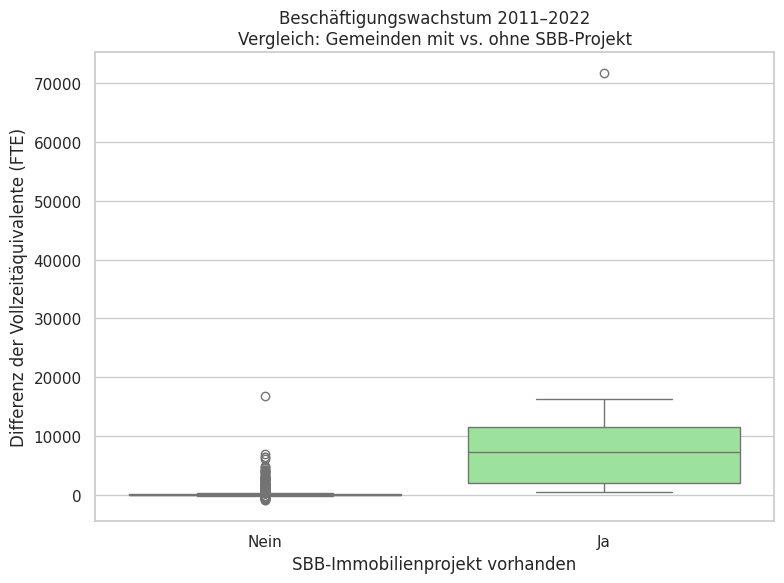

In [9]:
# Vorbereitung: Umwandlung der Gruppenzuordnung in lesbares Format
df_growth_plot = df_growth.reset_index()
df_growth_plot['SBB_Projekt'] = df_growth_plot['hat_sbb_projekt'].map({True: 'Ja', False: 'Nein'})

# Plot erstellen
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

sns.boxplot(
    x='SBB_Projekt',
    y='Differenz',
    data=df_growth_plot,
    palette={'Ja': "lightgreen", 'Nein': "lightblue"}
)

plt.title("Beschäftigungswachstum 2011–2022\nVergleich: Gemeinden mit vs. ohne SBB-Projekt")
plt.xlabel("SBB-Immobilienprojekt vorhanden")
plt.ylabel("Differenz der Vollzeitäquivalente (FTE)")
plt.tight_layout()
plt.show()

Da der Boxplot eine starke Verzerrung durch Ausreisser zeigt, wird der Median als robustere Vergleichsgrösse herangezogen. So lassen sich zentrale Tendenzen besser beurteilen.

In [10]:
median_mit = df_growth[df_growth['hat_sbb_projekt'] == True]['Differenz'].median()
median_ohne = df_growth[df_growth['hat_sbb_projekt'] == False]['Differenz'].median()

print(f"Median Wachstum mit Projekt: {median_mit:.0f}")
print(f"Median Wachstum ohne Projekt: {median_ohne:.0f}")


Median Wachstum mit Projekt: 7322
Median Wachstum ohne Projekt: 27


Die Effektstärke zeigt, wie gross der Unterschied zwischen beiden Gruppen ist – unabhängig von der Signifikanz.

In [11]:
# Sicherstellen, dass hat_sbb_projekt als Spalte vorhanden ist
df_growth_reset = df_growth.reset_index()

# Gruppen extrahieren
gruppe_mit = df_growth_reset[df_growth_reset['hat_sbb_projekt'] == True]['Differenz']
gruppe_ohne = df_growth_reset[df_growth_reset['hat_sbb_projekt'] == False]['Differenz']

# Mittelwerte & Varianz berechnen
mean_mit = gruppe_mit.mean()
mean_ohne = gruppe_ohne.mean()
std_pooled = np.sqrt((gruppe_mit.var() + gruppe_ohne.var()) / 2)

# Effektstärke berechnen
cohens_d = (mean_mit - mean_ohne) / std_pooled

# Ausgabe
print(f"Cohen's d: {cohens_d:.3f}")

Cohen's d: 0.883


###5.1.3 Geografische Visualisierung der Beschäftigungsentwicklung mit Hervorhebung von SBB-Projektgemeinden in der Schweiz
Zur vertieften Analyse der räumlichen Verteilung des Beschäftigungswachstums in Schweizer Gemeinden zwischen 2011 und 2022 wird eine thematische Karte erstellt. Die Veränderung der Vollzeitäquivalente (FTE) pro Gemeinde wird dabei farblich kodiert: Positive Werte (Wachstum) werden in Grüntönen, negative Werte (Rückgang) in Rottönen dargestellt.

Zusätzlich werden Gemeinden, in denen zwischen 2011 und 2022 ein SBB-Immobilienprojekt registriert wurde, schwarz umrandet visualisiert. Dies ermöglicht es, visuell zu prüfen, ob solche Projekte räumlich mit auffälligem ökonomischem Wachstum einhergehen. Die Karte ergänzt somit die vorherige Boxplot-Analyse um eine georäumliche Perspektive.

<ipython-input-17-7b48732ce5ea>:25: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  gdf_map['hat_sbb_projekt'] = gdf_map['hat_sbb_projekt'].fillna(False).astype(bool)


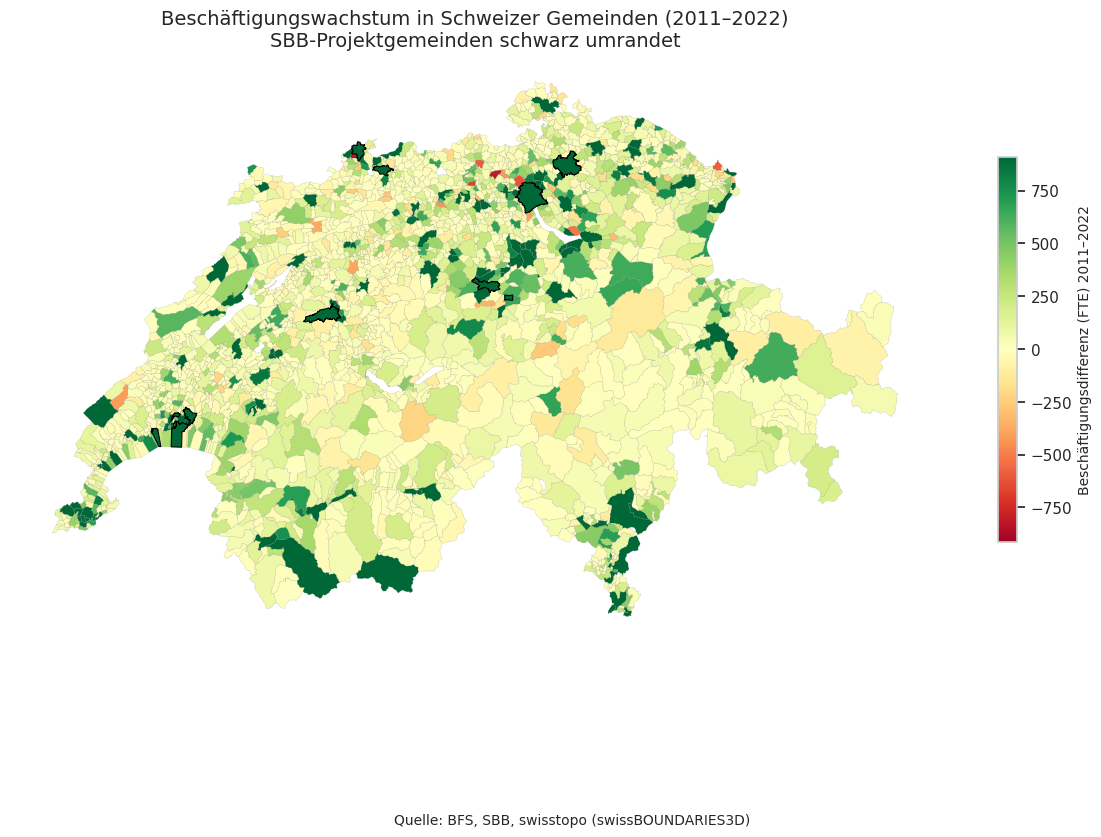

In [17]:
# 1. SBB-Projekt-Gemeinden ermitteln
bfs_ids_mit_sbb = set(df_sbb['BFS_ID'].dropna().unique())

# 2. Sicherstellen, dass df_bfs['hat_sbb_projekt'] existiert
df_bfs['hat_sbb_projekt'] = df_bfs['BFS_ID'].isin(bfs_ids_mit_sbb)

# 3. df_growth vorbereiten (falls noch nicht vorhanden)
df_fte = df_bfs[df_bfs['Jahr'].isin(['2011', '2022'])].copy()
df_pivot = df_fte.pivot_table(index='BFS_ID', columns='Jahr', values='Wert')
df_pivot['Differenz'] = df_pivot['2022'] - df_pivot['2011']
df_growth = df_pivot[['Differenz']].copy()

# 4. Projektstatus pro Gemeinde extrahieren
df_projstatus = df_bfs[df_bfs['Jahr'] == '2022'][['BFS_ID', 'hat_sbb_projekt']].drop_duplicates()

# 5. Beschäftigungswachstum + Projektstatus kombinieren
df_map = df_growth.reset_index().merge(df_projstatus, on='BFS_ID', how='left')

# 6. Geodaten einlesen und mergen
gdf_geo = gpd.read_file("/content/drive/MyDrive/Colab Notebooks/gemeindegrenzen_schweiz.gpkg", layer="tlm_hoheitsgebiet")
gdf_geo = gdf_geo.rename(columns={"bfs_nummer": "BFS_ID"})
gdf_map = gdf_geo.merge(df_map, on='BFS_ID', how='left')

# 7. Fehlt die Spalte 'hat_sbb_projekt'? Dann auffüllen
gdf_map['hat_sbb_projekt'] = gdf_map['hat_sbb_projekt'].fillna(False).astype(bool)

# 8. Farbskala (robust gegen Ausreisser)
vmin = np.percentile(gdf_map['Differenz'].dropna(), 5)
vmax = np.percentile(gdf_map['Differenz'].dropna(), 95)
abs_max = max(abs(vmin), abs(vmax))
norm = TwoSlopeNorm(vmin=-abs_max, vcenter=0, vmax=abs_max)

# 9. Karte plotten
fig, ax = plt.subplots(figsize=(15, 10))
gdf_map.plot(column='Differenz', cmap='RdYlGn', linewidth=0.1, edgecolor='grey', ax=ax, norm=norm)

# 10. Gemeinden mit SBB-Projekt schwarz umrahmen
gdf_map[gdf_map['hat_sbb_projekt']].boundary.plot(ax=ax, color='black', linewidth=0.8)

# 11. Farbskala hinzufügen
cmap = plt.cm.RdYlGn
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm._A = []
cbar = fig.colorbar(sm, ax=ax, shrink=0.5)
cbar.set_label("Beschäftigungsdifferenz (FTE) 2011–2022", fontsize=10)

# 12. Stil & Ausgabe
ax.axis('off')
plt.title("Beschäftigungswachstum in Schweizer Gemeinden (2011–2022)\nSBB-Projektgemeinden schwarz umrandet", fontsize=14)
plt.figtext(0.5, 0.02, "Quelle: BFS, SBB, swisstopo (swissBOUNDARIES3D)", ha='center', fontsize=10)
plt.show()

Um gezielt die auffälligsten Regionen darzustellen, wird ein Kartenausschnitt mit den Top 5% Gemeinden nach Wachstum (FTE-Differenz) generiert.

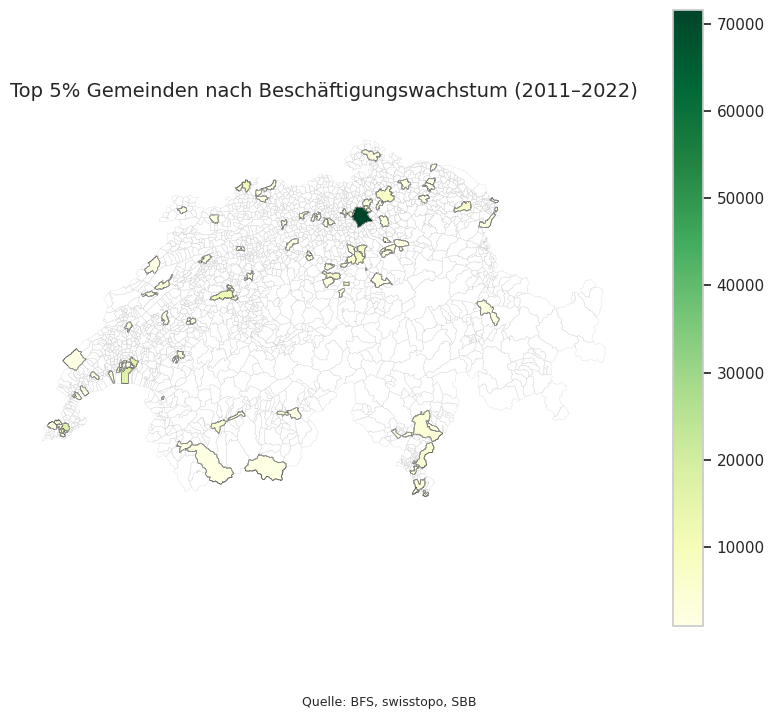

In [18]:
# Geo-Daten neu verknüpfen
gdf_geo = gpd.read_file("/content/drive/MyDrive/Colab Notebooks/gemeindegrenzen_schweiz.gpkg", layer="tlm_hoheitsgebiet")
gdf_geo = gdf_geo.rename(columns={"bfs_nummer": "BFS_ID"})
gdf_map = gdf_geo.merge(df_growth, on="BFS_ID", how="left")

# Top 5% auswählen
threshold = df_growth['Differenz'].quantile(0.95)
gdf_top = gdf_map[gdf_map['Differenz'] >= threshold]

# Karte
fig, ax = plt.subplots(figsize=(10, 8))
gdf_geo.boundary.plot(ax=ax, linewidth=0.2, color='lightgrey')
gdf_top.plot(column='Differenz', cmap='YlGn', linewidth=0.5, edgecolor='black', ax=ax, legend=True)

plt.title("Top 5% Gemeinden nach Beschäftigungswachstum (2011–2022)", fontsize=14)
plt.figtext(0.5, 0.01, "Quelle: BFS, swisstopo, SBB", ha='center', fontsize=9)
ax.axis('off')
plt.show()


###5.1.4 T-Test zur Signifikanzprüfung des Beschäftigungswachstums zwischen Gruppen
Um die erste Forschungsfrage systematisch zu untersuchen, wird überprüft, ob sich das durchschnittliche Beschäftigungswachstum in Gemeinden mit einem SBB-Projekt statistisch signifikant von jenem in Gemeinden ohne Projekt unterscheidet. Dazu wird ein Welch-T-Test durchgeführt, da dieser im Gegensatz zum klassischen T-Test keine gleiche Varianz in den beiden Gruppen voraussetzt. Diese Methode eignet sich besonders bei ungleichen Gruppengrössen und Heteroskedastizität.

Ein p-Wert kleiner als 0.05 wird dabei als statistisch signifikant interpretiert, was auf einen systematischen Unterschied im Beschäftigungswachstum zwischen den beiden Gemeindetypen hinweist. Damit lässt sich prüfen, ob SBB-Projekte als möglicher Treiber ökonomischer Dynamik interpretiert werden können.

In [21]:
gruppe_mit = df_map[df_map['hat_sbb_projekt'] == True]['Differenz'].dropna()
gruppe_ohne = df_map[df_map['hat_sbb_projekt'] == False]['Differenz'].dropna()

t_stat, p_value = ttest_ind(gruppe_mit, gruppe_ohne, equal_var=False)

print(f"T-Statistik: {t_stat:.3f}")
print(f"p-Wert: {p_value:.5f}")

# Interpretation
if p_value < 0.05:
    print("✅ Der Unterschied ist statistisch signifikant (p < 0.05).")
else:
    print("❌ Kein signifikanter Unterschied nach klassischem Schwellenwert.")

T-Statistik: 1.873
p-Wert: 0.09790
❌ Kein signifikanter Unterschied nach klassischem Schwellenwert.


Einige grosse Städte verfälschen möglicherweise das Ergebnis. Durch Ausschluss der Top 1% der FTE-Differenzen wird die Robustheit des Tests verbessert.

In [34]:
# Top-1%-Cutoff bestimmen (obere 1% entfernen)
cutoff = df_growth['Differenz'].quantile(0.99)
df_growth_trimmed = df_growth[df_growth['Differenz'] <= cutoff]

# Behalte 'hat_sbb_projekt' beim Trimmen
df_growth_trimmed = df_growth_trimmed.merge(df_bfs[['BFS_ID', 'hat_sbb_projekt']].drop_duplicates(), on='BFS_ID', how='left')

# Gruppen neu definieren (ohne Indexzugriff!)
gruppe_mit_trimmed = df_growth_trimmed[df_growth_trimmed['hat_sbb_projekt'] == True]['Differenz']
gruppe_ohne_trimmed = df_growth_trimmed[df_growth_trimmed['hat_sbb_projekt'] == False]['Differenz']

# T-Test
t_stat_trim, p_value_trim = ttest_ind(gruppe_mit_trimmed, gruppe_ohne_trimmed, equal_var=False)

# Ergebnis ausgeben
print(f"T-Statistik (getrimmt): {t_stat_trim:.3f}")
print(f"p-Wert (getrimmt): {p_value_trim:.5f}")

if p_value_trim < 0.05:
    print("✅ Signifikanter Unterschied nach Ausschluss extremer Ausreisser.")
else:
    print("❌ Auch ohne Ausreisser kein signifikanter Unterschied.")


T-Statistik (getrimmt): 2.348
p-Wert (getrimmt): 0.14329
❌ Auch ohne Ausreisser kein signifikanter Unterschied.


##5.2 Gibt es Anzeichen dafür, dass SBB-Investitionen die Standortattraktivität für Unternehmen erhöhen?
In diesem Abschnitt wird untersucht, ob und inwiefern SBB-Investitionsprojekte einen Einfluss auf die Anzahl der Unternehmensgründungen in den betroffenen Gemeinden haben. Die Analyse basiert auf Daten zu Unternehmensgründungen in der Schweiz zwischen 2013 und 2022, wobei Gemeinden mit und ohne SBB-Projekte miteinander verglichen werden.

Um eine fundierte und evidenzbasierte Untersuchung zu gewährleisten, wird ein mehrstufiges methodisches Vorgehen angewendet. Zunächst erfolgt eine Datenvorbereitung, in der sichergestellt wird, dass die relevanten Variablen korrekt formatiert sind. Zudem werden mögliche Ausreisser mit der Interquartilsabstand (IQR)-Methode identifiziert und entfernt, um Verzerrungen durch extreme Werte zu vermeiden.

Im Anschluss daran wird eine deskriptive Statistik durchgeführt, um die durchschnittlichen Unternehmensgründungen in Gemeinden mit und ohne SBB-Projektstatus zu vergleichen. Dies gibt eine erste Indikation darüber, ob es zwischen den Gruppen Unterschiede gibt.

Zur Überprüfung der statistischen Signifikanz der beobachteten Unterschiede wird ein T-Test für unabhängige Stichproben angewendet. Dieser Test erlaubt eine Aussage darüber, ob die Unterschiede in den Gründungszahlen zufallsbedingt sind oder systematische Effekte aufweisen.

Darauf aufbauend wird eine lineare Regressionsanalyse durchgeführt. Diese Methode erlaubt es, den Einfluss des SBB-Projektstatus auf die Anzahl der Unternehmensgründungen zu quantifizieren und zu prüfen, ob dieser Einfluss auch unter Kontrolle anderer Faktoren statistisch signifikant bleibt.

Abschliessend werden die Ergebnisse visuell aufbereitet, um die Unterschiede zwischen den Gruppen übersichtlich darzustellen und die gewonnenen Erkenntnisse verständlich zu präsentieren.

Die gesamte Analyse wird jeweils mit und ohne Ausreisser durchgeführt, um deren Einfluss auf die Ergebnisse zu überprüfen und eine robuste Interpretation der Resultate zu ermöglichen.

###5.2.1 Datenvorbereitung
In diesem Schritt wird sichergestellt, dass die Daten korrekt formatiert sind.
Die Spalte 'hat_sbb_projekt' wird in numerische Werte (0/1) umgewandelt, um eine spätere Analyse zu ermöglichen. Zudem wird überprüft, dass die Gründungszahlen numerisch vorliegen. Zusätzlich werden Ausreisser mithilfe der IQR-Methode entfernt.


In [35]:
import statsmodels.api as sm

df_bfs['hat_sbb_projekt'] = df_bfs['hat_sbb_projekt'].astype(int)
df_bfs['Gruendungen_2013_2022'] = pd.to_numeric(df_bfs['Gruendungen_2013_2022'], errors='coerce')

# Entfernen von Ausreissern mit der IQR-Methode
Q1 = df_bfs['Gruendungen_2013_2022'].quantile(0.25)
Q3 = df_bfs['Gruendungen_2013_2022'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_bfs_no_outliers = df_bfs[(df_bfs['Gruendungen_2013_2022'] >= lower_bound) & (df_bfs['Gruendungen_2013_2022'] <= upper_bound)]

### 5.2.2 Deskriptive Statistik
Hier werden die durchschnittlichen Unternehmensgründungen in Gemeinden mit und ohne SBB-Projekte berechnet. Dies gibt einen ersten Überblick über mögliche Unterschiede zwischen den Gruppen.

In [36]:
# Mit Ausreisser
sbb = df_bfs[df_bfs['hat_sbb_projekt'] == 1]['Gruendungen_2013_2022'].dropna()
non_sbb = df_bfs[df_bfs['hat_sbb_projekt'] == 0]['Gruendungen_2013_2022'].dropna()

print("Durchschnittliche Gründungen (SBB-Gemeinden):", sbb.mean())
print("Durchschnittliche Gründungen (Nicht-SBB-Gemeinden):", non_sbb.mean())

Durchschnittliche Gründungen (SBB-Gemeinden): 223.88888888888889
Durchschnittliche Gründungen (Nicht-SBB-Gemeinden): 179.12969121140142


In [37]:
# Ohne Ausreisser
sbb_no_outliers = df_bfs_no_outliers[df_bfs_no_outliers['hat_sbb_projekt'] == 1]['Gruendungen_2013_2022'].dropna()
non_sbb_no_outliers = df_bfs_no_outliers[df_bfs_no_outliers['hat_sbb_projekt'] == 0]['Gruendungen_2013_2022'].dropna()

print("Durchschnittliche Gründungen (SBB-Gemeinden, ohne Ausreißer):", sbb_no_outliers.mean())
print("Durchschnittliche Gründungen (Nicht-SBB-Gemeinden, ohne Ausreißer):", non_sbb_no_outliers.mean())

Durchschnittliche Gründungen (SBB-Gemeinden, ohne Ausreißer): 143.71428571428572
Durchschnittliche Gründungen (Nicht-SBB-Gemeinden, ohne Ausreißer): 114.36901698404529


### 5.2.3 Statistische Signifikanzprüfung mittels T-Test
Um zu prüfen, ob die Unterschiede zwischen den beiden Gruppen statistisch signifikant sind, wird ein T-Test durchgeführt. Dies hilft zu bestimmen, ob die beobachteten Unterschiede auf Zufall beruhen oder systematische Effekte vorliegen.

In [38]:
# Mit Ausreissern
import scipy.stats as stats

stat, p_value = ttest_ind(sbb, non_sbb, equal_var=False)
print(f'T-Test Ergebnis: t={stat:.3f}, p={p_value:.3f}')

# Interpretation
if p_value < 0.05:
    print("✅ Der Unterschied ist statistisch signifikant (p < 0.05).")
else:
    print("❌ Kein signifikanter Unterschied nach klassischem Schwellenwert.")

T-Test Ergebnis: t=2.881, p=0.005
✅ Der Unterschied ist statistisch signifikant (p < 0.05).


In [39]:
# Ohne Ausreisser

t_stat_no_outliers, p_value_no_outliers = ttest_ind(sbb_no_outliers, non_sbb_no_outliers, equal_var=False)
print(f'T-Test Ergebnis (ohne Ausreißer): t={t_stat_no_outliers:.3f}, p={p_value_no_outliers:.3f}')

# Interpretation
if p_value_no_outliers < 0.05:
    print("✅ Der Unterschied ist statistisch signifikant (p < 0.05).")
else:
    print("❌ Kein signifikanter Unterschied nach klassischem Schwellenwert.")

T-Test Ergebnis (ohne Ausreißer): t=7.821, p=0.000
✅ Der Unterschied ist statistisch signifikant (p < 0.05).


### 5.2.4 Regressionsanalyse
Um den Einfluss der SBB-Projekte auf die Unternehmensgründungen zu untersuchen,
wird eine einfache lineare Regression durchgeführt. Dabei wird analysiert,
ob die Zugehörigkeit zu einer SBB-Gemeinde als Prädiktor für die Anzahl der Unternehmensgründungen dient.

In [40]:
# Mit Ausreissern

X = df_bfs[['hat_sbb_projekt']]
Y = df_bfs['Gruendungen_2013_2022']

# Entferne Zeilen mit fehlenden Werten in X oder Y
data = pd.concat([X, Y], axis=1).dropna()
X = data[['hat_sbb_projekt']]
Y = data['Gruendungen_2013_2022']

X = sm.add_constant(X)  # Hinzufügen der Konstante für Regression

model = sm.OLS(Y, X).fit()
print(model.summary())

                              OLS Regression Results                             
Dep. Variable:     Gruendungen_2013_2022   R-squared:                       0.000
Model:                               OLS   Adj. R-squared:                  0.000
Method:                    Least Squares   F-statistic:                     1.508
Date:                   Tue, 01 Apr 2025   Prob (F-statistic):              0.219
Time:                           11:29:14   Log-Likelihood:            -1.8655e+05
No. Observations:                  25368   AIC:                         3.731e+05
Df Residuals:                      25366   BIC:                         3.731e+05
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const       

In [41]:
# Ohne Ausreisser

X_no_outliers = df_bfs_no_outliers[['hat_sbb_projekt']]
Y_no_outliers = df_bfs_no_outliers['Gruendungen_2013_2022']
data_no_outliers = pd.concat([X_no_outliers, Y_no_outliers], axis=1).dropna()
X_no_outliers = data_no_outliers[['hat_sbb_projekt']]
Y_no_outliers = data_no_outliers['Gruendungen_2013_2022']
X_no_outliers = sm.add_constant(X_no_outliers)
model_no_outliers = sm.OLS(Y_no_outliers, X_no_outliers).fit()
print("Regressionsanalyse ohne Ausreisser:")
print(model_no_outliers.summary())

Regressionsanalyse ohne Ausreisser:
                              OLS Regression Results                             
Dep. Variable:     Gruendungen_2013_2022   R-squared:                       0.001
Model:                               OLS   Adj. R-squared:                  0.001
Method:                    Least Squares   F-statistic:                     14.82
Date:                   Tue, 01 Apr 2025   Prob (F-statistic):           0.000118
Time:                           11:29:16   Log-Likelihood:            -1.3253e+05
No. Observations:                  23400   AIC:                         2.651e+05
Df Residuals:                      23398   BIC:                         2.651e+05
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

### 5.2.5 Visualisierung der Ergebnisse
Eine Boxplot-Darstellung ermöglicht es, die Unterschiede in den Unternehmensgründungen zwischen Gemeinden mit und ohne SBB-Projekte visuell zu erfassen.

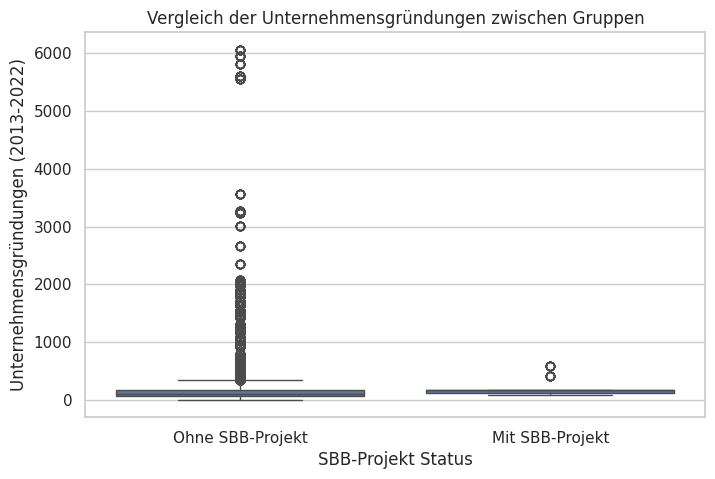

In [42]:
# Mit Ausreissern

plt.figure(figsize=(8, 5))
sns.boxplot(x=df_bfs['hat_sbb_projekt'], y=df_bfs['Gruendungen_2013_2022'])
plt.xticks([0, 1], ['Ohne SBB-Projekt', 'Mit SBB-Projekt'])
plt.xlabel("SBB-Projekt Status")
plt.ylabel("Unternehmensgründungen (2013-2022)")
plt.title("Vergleich der Unternehmensgründungen zwischen Gruppen")
plt.show()


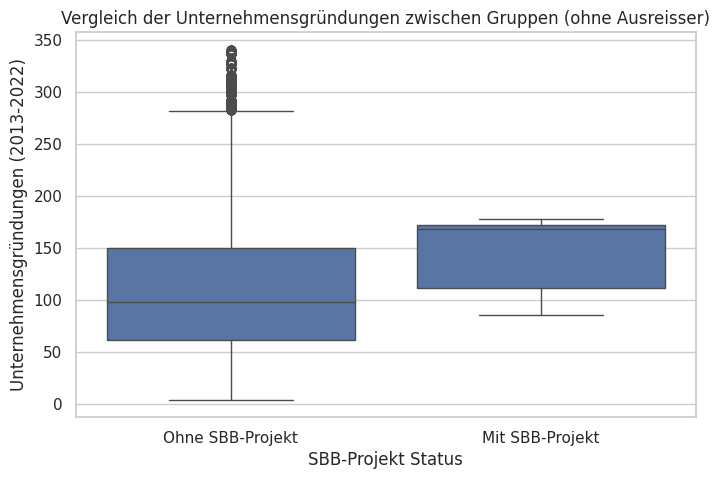

In [43]:
# Ohne Ausreisser

plt.figure(figsize=(8, 5))
sns.boxplot(x=df_bfs_no_outliers['hat_sbb_projekt'], y=df_bfs_no_outliers['Gruendungen_2013_2022'])
plt.xticks([0, 1], ['Ohne SBB-Projekt', 'Mit SBB-Projekt'])
plt.xlabel("SBB-Projekt Status")
plt.ylabel("Unternehmensgründungen (2013-2022)")
plt.title("Vergleich der Unternehmensgründungen zwischen Gruppen (ohne Ausreisser)")
plt.show()


### 5.2.6 Fazit
Die durchgeführte Analyse zeigt, dass Gemeinden mit SBB-Investitionsprojekten im Durchschnitt eine höhere Anzahl an Unternehmensgründungen aufweisen als Gemeinden ohne solche Projekte. Dieser Unterschied wurde sowohl in der deskriptiven Statistik als auch durch die statistische Signifikanzprüfung mittels T-Test bestätigt.

Vor der Bereinigung von Ausreissern lag der durchschnittliche Wert für Unternehmensgründungen in SBB-Gemeinden bei 223.89, während er in Nicht-SBB-Gemeinden 179.13 betrug. Der T-Test ergab eine signifikante Differenz (t = 2.881, p = 0.005), was darauf hindeutet, dass die Unterschiede zwischen den Gruppen nicht zufällig sind. Allerdings zeigte die lineare Regressionsanalyse in diesem Fall keinen signifikanten Einfluss des SBB-Projektstatus auf die Gründungszahlen (p = 0.219).

Nach der Entfernung von Ausreissern mittels der IQR-Methode reduzierten sich die durchschnittlichen Gründungszahlen auf 143.71 für SBB-Gemeinden und 114.37 für Nicht-SBB-Gemeinden. Der T-Test ergab hier ein noch stärker signifikantes Ergebnis (t = 7.821, p < 0.001), was die Annahme eines systematischen Effekts weiter stützt. Auch die Regressionsanalyse zeigte nun einen signifikanten Einfluss des SBB-Projektstatus auf die Unternehmensgründungen (p < 0.001), mit einem positiven Effekt von rund 29 zusätzlichen Gründungen in SBB-Gemeinden.

Diese Ergebnisse deuten darauf hin, dass SBB-Projekte mit einem positiven Einfluss auf die lokale wirtschaftliche Dynamik verbunden sein könnten. Besonders nach der Bereinigung von Ausreissern zeigt sich ein robuster statistischer Zusammenhang. Allerdings bleibt unklar, ob dieser Effekt kausal ist oder ob zusätzliche Faktoren – wie Standortattraktivität oder bereits bestehende wirtschaftliche Strukturen – eine Rolle spielen.

Zusammenfassend lässt sich sagen, dass SBB-Gemeinden tendenziell höhere Unternehmensgründungsraten aufweisen als Gemeinden ohne SBB-Projekte. Während der Einfluss in der Rohanalyse statistisch nicht eindeutig nachweisbar war, bestätigt die Bereinigung der Daten eine signifikante positive Korrelation. Um kausale Effekte klarer herauszuarbeiten, wären weiterführende Analysen mit zusätzlichen Kontrollvariablen oder einem differenzierteren methodischen Ansatz notwendig.

##5.3 Inwieweit verändern sich Mietpreise oder die Nachfrage nach Büro- und Gewerbeflächen in Projektgemeinden?
Einletungstext...

##5.4 Welche wirtschaftlichen Branchen profitieren besonders stark von den Immobilienprojekten?
Einletungstext...

##5.5 Können aus den analysierten Daten Empfehlungen für Gemeinden, Investoren oder die SBB selbst abgeleitet werden?
Einletungstext...


### Import des Datensatzes
Inkl. erster kleiner Bereinigungen

In [ ]:
# Data source URL
url = "https://www.pxweb.bfs.admin.ch/api/v1/de/px-x-0602010000_102/px-x-0602010000_102.px"

# Function to retrieve the data for a specific combination of parameters
def fetch_data(years, wirtschaftssektoren, beobachtungseinheiten):
    query = {
        "query": [
            {
                "code": "Jahr",
                "selection": {
                    "filter": "item",
                    "values": years
                }
            },
            {
                "code": "Wirtschaftssektor",
                "selection": {
                    "filter": "item",
                    "values": wirtschaftssektoren
                }
            },
            {
                "code": "Beobachtungseinheit",
                "selection": {
                    "filter": "item",
                    "values": beobachtungseinheiten
                }
            }
        ],
        "response": {
            "format": "json-stat2"
        }
    }
    response = requests.post(url, json=query)
    return response.json()

# Parameters for the query
years = ["2011", "2022"]
wirtschaftssektoren = ["999"]
beobachtungseinheiten = ["5"]

# Fetch data
data = fetch_data(years, wirtschaftssektoren, beobachtungseinheiten)

# Create DataFrame
df = pd.DataFrame(columns=["Jahr", "Gemeinde", "Wirtschaftssektor", "Beobachtungseinheit", "Wert"])

# Auxiliary function for calculating the product of a list
def prod(iterable):
    result = 1
    for x in iterable:
        result *= x
    return result

# Extract data and insert it into DataFrame
dimensions = ["Jahr", "Gemeinde", "Wirtschaftssektor", "Beobachtungseinheit"]
df = pd.DataFrame(columns=dimensions + ["Wert"])

sizes = [len(data["dimension"][dim]["category"]["index"]) for dim in dimensions]

for combination in itertools.product(*[data["dimension"][dim]["category"]["index"].keys() for dim in dimensions]):
    index = 0
    for i, val in enumerate(combination):
        # Convert the string index to an integer
        dim_index = int(data["dimension"][dimensions[i]]["category"]["index"][val])
        index += dim_index * prod(sizes[i+1:])

    value = data["value"][index]

    row = dict(zip(dimensions, combination))
    row["Wert"] = value
    df = pd.concat([df, pd.DataFrame([row])], ignore_index=True)

# Replace the codes with their descriptions
for dim in dimensions:
    df[dim] = df[dim].map(data["dimension"][dim]["category"]["label"])

# Splitting the municipality column into postcode and city
df[['PLZ', 'Ort']] = df['Gemeinde'].str.split(' ', n=1, expand=True)

# Remove the original municipality column
df = df.drop(columns=['Gemeinde'])

# Delete all entries that have None or NaN in Location
df.dropna(subset=['Ort'], inplace=True)

# Show DataFrame
print(df)


      Jahr          Wirtschaftssektor  Beobachtungseinheit  Wert   PLZ  \
1     2011  Wirtschaftssektor - Total  Vollzeitäquivalente   312     1   
2     2011  Wirtschaftssektor - Total  Vollzeitäquivalente  4414     2   
3     2011  Wirtschaftssektor - Total  Vollzeitäquivalente   618     3   
4     2011  Wirtschaftssektor - Total  Vollzeitäquivalente   682     4   
5     2011  Wirtschaftssektor - Total  Vollzeitäquivalente  1248     5   
...    ...                        ...                  ...   ...   ...   
4287  2022  Wirtschaftssektor - Total  Vollzeitäquivalente   230  6806   
4288  2022  Wirtschaftssektor - Total  Vollzeitäquivalente   343  6807   
4289  2022  Wirtschaftssektor - Total  Vollzeitäquivalente   513  6808   
4290  2022  Wirtschaftssektor - Total  Vollzeitäquivalente   655  6809   
4291  2022  Wirtschaftssektor - Total  Vollzeitäquivalente   302  6810   

                     Ort  
1        Aeugst am Albis  
2     Affoltern am Albis  
3             Bonstetten  
4  

In [ ]:
print(data)

{'class': 'dataset', 'label': 'Arbeitsstätten und Beschäftigte nach Jahr, Gemeinde, Wirtschaftssektor und Beobachtungseinheit', 'source': 'BFS - Statistik der Unternehmensstruktur - © BFS', 'updated': '2013-11-15T08:15:00Z', 'id': ['Jahr', 'Gemeinde', 'Wirtschaftssektor', 'Beobachtungseinheit'], 'size': [2, 2146, 1, 1], 'dimension': {'Jahr': {'extension': {'show': 'value'}, 'label': 'Jahr', 'category': {'index': {'2011': 0, '2022': 1}, 'label': {'2011': '2011', '2022': '2022'}}}, 'Gemeinde': {'extension': {'show': 'value'}, 'label': 'Gemeinde', 'category': {'index': {'99999': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, '10': 10, '11': 11, '12': 12, '13': 13, '14': 14, '21': 15, '22': 16, '23': 17, '24': 18, '25': 19, '26': 20, '27': 21, '28': 22, '29': 23, '30': 24, '31': 25, '32': 26, '33': 27, '34': 28, '35': 29, '37': 30, '38': 31, '39': 32, '40': 33, '41': 34, '43': 35, '51': 36, '52': 37, '53': 38, '54': 39, '55': 40, '56': 41, '57': 42, '58': 43, '5

### Analyse des Datensat 1

In [ ]:
print(df.describe())

        Jahr          Wirtschaftssektor  Beobachtungseinheit  Wert   PLZ  \
count   4290                       4290                 4290  4287  4290   
unique     2                          1                    1  1935  2145   
top     2011  Wirtschaftssektor - Total  Vollzeitäquivalente    53     1   
freq    2145                       4290                 4290    17     2   

                    Ort  
count              4290  
unique             2145  
top     Aeugst am Albis  
freq                  2  


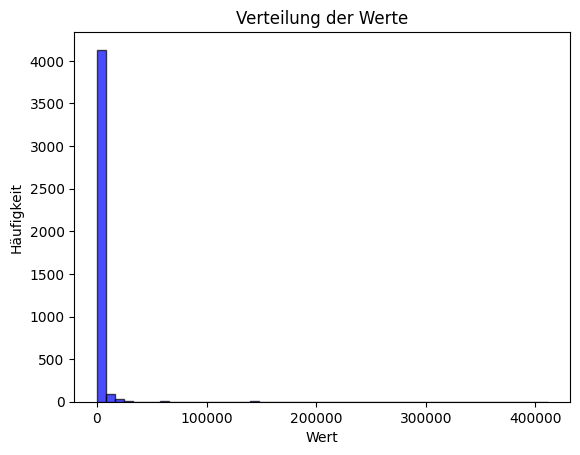

In [ ]:
df['Wert'] = pd.to_numeric(df['Wert'], errors='coerce')

plt.hist(df['Wert'], bins=50, alpha=0.7, color='blue', edgecolor='black')
plt.title('Verteilung der Werte')
plt.xlabel('Wert')
plt.ylabel('Häufigkeit')
plt.show()

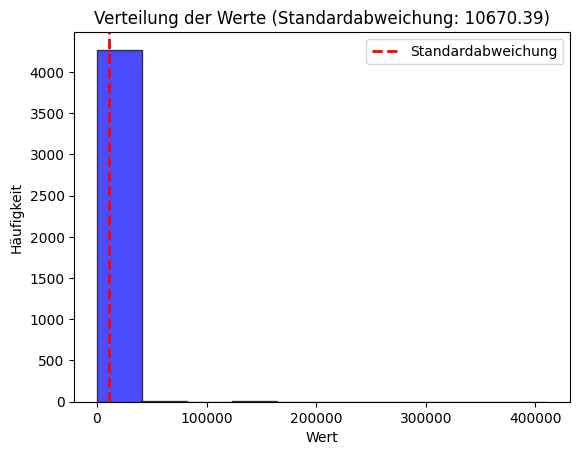

In [ ]:
# Calculate the standard deviation
standard_deviation = df['Wert'].std()

# Create the histogram
plt.hist(df['Wert'], bins=10, alpha=0.7, color='blue', edgecolor='black')
plt.title('Verteilung der Werte (Standardabweichung: {:.2f})'.format(standard_deviation))
plt.xlabel('Wert')
plt.ylabel('Häufigkeit')

# Add a vertical line to represent the standard deviation
plt.axvline(standard_deviation, color='red', linestyle='dashed', linewidth=2, label='Standardabweichung')

plt.legend()  # Show the legend for the standard deviation line
plt.show()

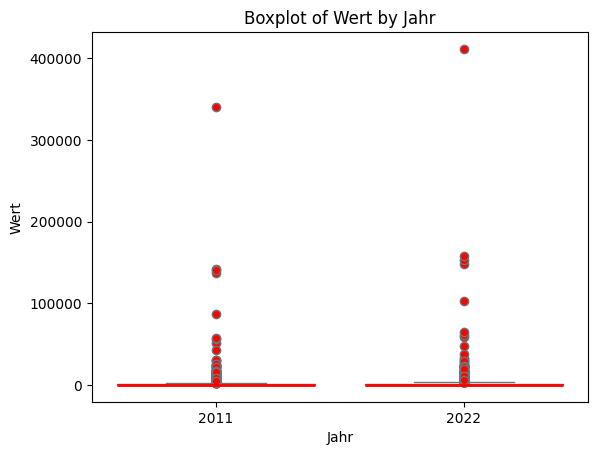

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Jahr', y='Wert', data=df, hue='Jahr',
            palette=['lightblue', 'lightgreen'],
            medianprops=dict(color='red', linewidth=2),
            flierprops=dict(marker='o', markerfacecolor='red', markersize=6))


plt.title('Boxplot of Wert by Jahr')
plt.xlabel('Jahr')
plt.ylabel('Wert')

plt.show()

<Axes: xlabel='Wert', ylabel='Proportion'>

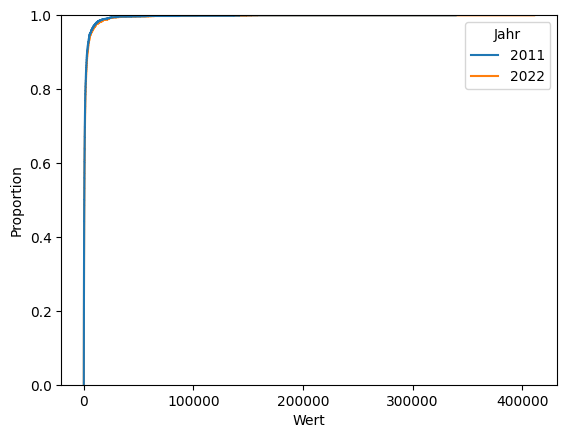

In [ ]:
sns.ecdfplot(data=df, x='Wert', hue='Jahr')


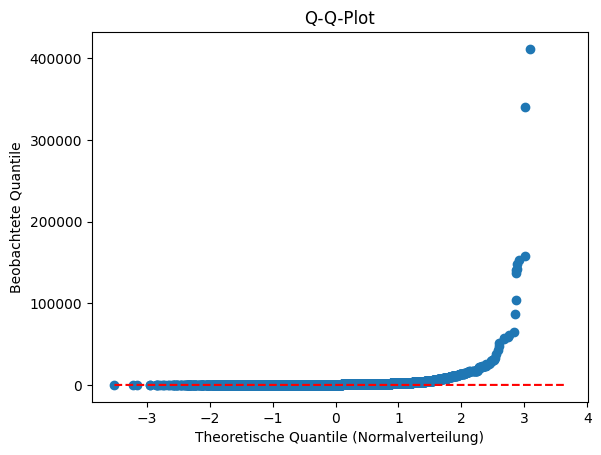

In [ ]:
from scipy import stats

data = df['Wert']

quantiles_data = np.sort(data)
quantiles_norm = np.sort(stats.norm.rvs(size=len(data)))

# Plotte den Q-Q-Plot
plt.scatter(quantiles_norm, quantiles_data)
plt.plot(quantiles_norm, quantiles_norm, 'r--')  # Referenzlinie
plt.title('Q-Q-Plot')
plt.xlabel('Theoretische Quantile (Normalverteilung)')
plt.ylabel('Beobachtete Quantile')
plt.show()

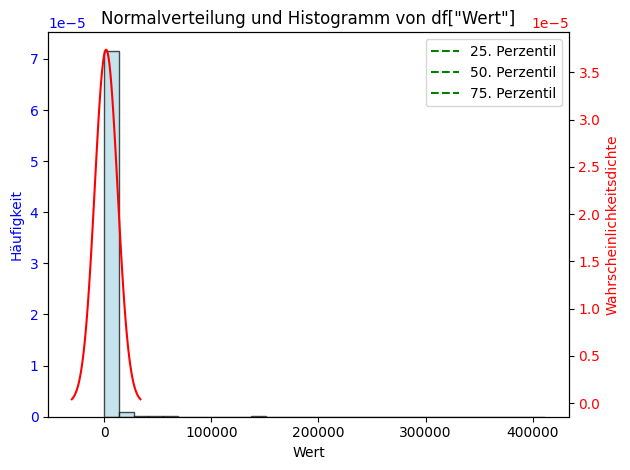

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# Extrahiere die Werte aus der Spalte df['Wert']
data = df['Wert']

# Berechne den Mittelwert und die Standardabweichung der Daten
mu = np.mean(data)
sigma = np.std(data)

# Erstelle den x-Bereich für die Verteilung
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)

# Definiere die gewünschten Perzentile
percentiles = [25, 50, 75]  # Beispiel: 25., 50. und 75. Perzentil

# Berechne die Werte der Perzentile
percentile_values = np.percentile(data, percentiles)

# Erstelle den Plot
fig, ax1 = plt.subplots()

# Plotte das Histogramm auf der linken y-Achse
ax1.hist(data, bins=30, density=True, alpha=0.7, color='lightblue', edgecolor='black')
ax1.set_xlabel('Wert')
ax1.set_ylabel('Häufigkeit', color='blue')
ax1.tick_params('y', labelcolor='blue')

# Erstelle eine zweite y-Achse für die Normalverteilung
ax2 = ax1.twinx()

# Plotte die Normalverteilung auf der rechten y-Achse
ax2.plot(x, stats.norm.pdf(x, mu, sigma), color='red', linestyle='-')
ax2.set_ylabel('Wahrscheinlichkeitsdichte', color='red')
ax2.tick_params('y', labelcolor='red')

# Plotte die Perzentile als vertikale Linien
for percentile, value in zip(percentiles, percentile_values):
    plt.axvline(x=value, color='green', linestyle='--', label=f'{percentile}. Perzentil')

plt.title('Normalverteilung und Histogramm von df["Wert"]')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
data = df['Wert']

data = df['Wert'].dropna()

print(df['Wert'].mean())
print(df['Wert'].median())
print(df['Wert'].mode())

# Berechne die Perzentile
percentile_5 = np.percentile(data, 5)
percentile_95 = np.percentile(data, 95)

# Gib die Perzentile aus
print(f"5. Perzentil: {percentile_5}")
print(f"95. Perzentil: {percentile_95}")

1891.343830184278
426.0
0    53.0
Name: Wert, dtype: float64
5. Perzentil: 36.0
95. Perzentil: 6149.4


## Berechnung der Differenzen

In [ ]:
# Calculating the difference between the years 2011 and 2022 based on the data frame df
df_2011_2022 = df[df['Jahr'].isin(['2011', '2022'])]

# Pivoting the DataFrame to have the years as columns
pivoted_df = df_2011_2022.pivot(index='PLZ', columns='Jahr', values='Wert')

 # Calculating the difference between 2022 and 2011
pivoted_df['Differenz'] = pivoted_df['2022'] - pivoted_df['2011']

print(pivoted_df)

Jahr  2011  2022 Differenz
PLZ                       
1      312   297       -15
10     931  1009        78
100    413   385       -28
1001   139   135        -4
1002  1153  1319       166
...    ...   ...       ...
990     40    61        21
991     73    73         0
992    947   811      -136
993     86    82        -4
995    881   998       117

[2145 rows x 3 columns]


## Erstellen der Schweizerkarte der Differenzent zwischen 2011 und 2022

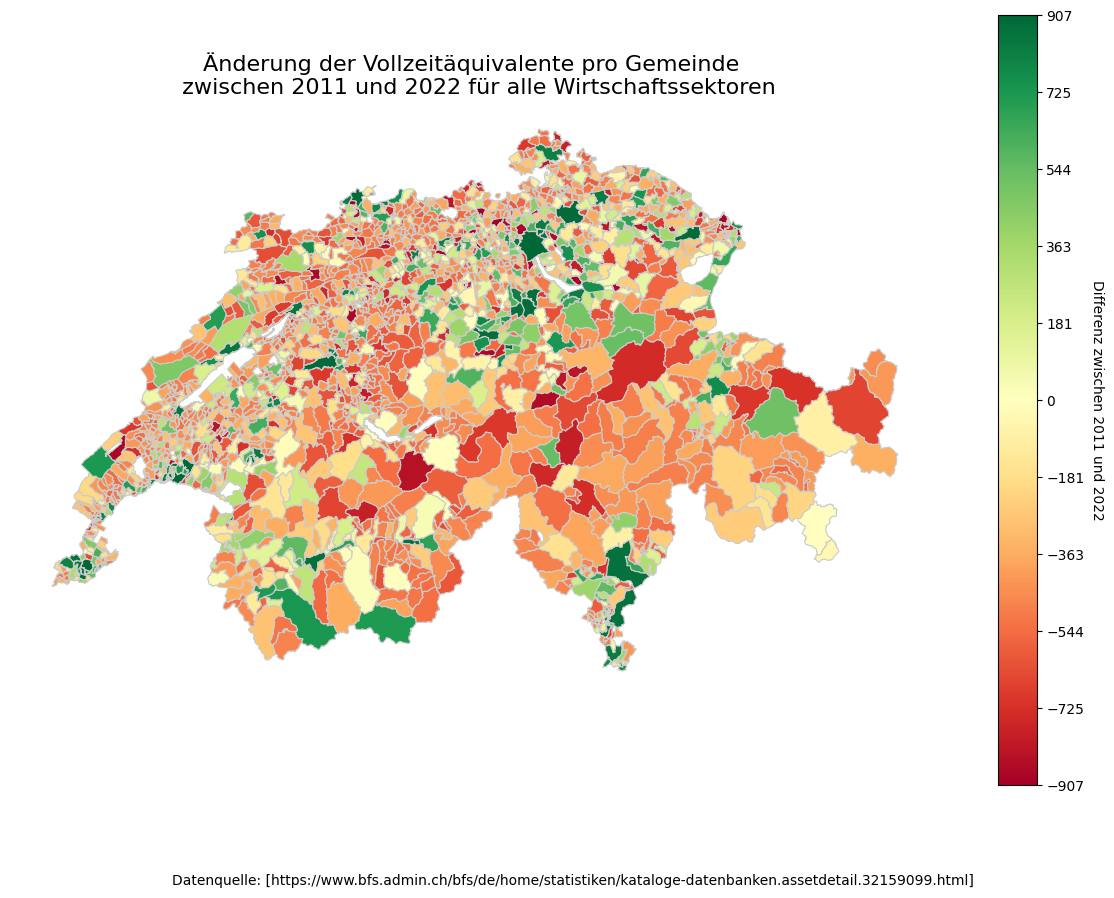

In [ ]:
# Load Switzerland's geographical data (GeoJSON file containing municipality boundaries)
switzerland = gpd.read_file('/content/drive/MyDrive/ColabNotebooks/gemeinden.geojson')

# Reset the index of pivoted_df to make 'PLZ' a column
pivoted_df = pivoted_df.reset_index()

# Convert the 'PLZ' column in the pivoted DataFrame to numeric type for merging
pivoted_df['PLZ'] = pd.to_numeric(pivoted_df['PLZ'])

# Merge the geographical data (switzerland) with the pivoted data (pivoted_df) based on municipality BFS number and PLZ
merged_data = switzerland.merge(pivoted_df, left_on='gemeinde.BFS_NUMMER', right_on='PLZ', how="left")

# Remove rows with missing values (NaN) from the merged dataset
merged_data = merged_data.dropna()

# Create a Matplotlib figure and axis for plotting
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Calculate the 5th and 95th percentiles of the 'Differenz' column to limit extreme values
vmin = np.percentile(merged_data['Differenz'], 5)
vmax = np.percentile(merged_data['Differenz'], 95)

# Calculate the absolute maximum value to create a symmetric color scale around 0
abs_max = np.max(np.abs([vmin, vmax]))

# Set vmin and vmax to symmetric values around 0 for better visualization of positive and negative differences
vmin = -abs_max
vmax = abs_max

# Create a normalization function that centers the colormap at 0 (TwoSlopeNorm)
norm = TwoSlopeNorm(vmin=vmin, vcenter=0, vmax=vmax)

# Add a small constant (+1) to 'Differenz' values to avoid issues with LogNorm (logarithmic scaling requires >0 values)
merged_data['Differenz_abs'] = merged_data['Differenz'].abs() + 1

# Plot the map using GeoPandas with the 'Differenz' column determining the color scale
im = merged_data.plot(column='Differenz', cmap='RdYlGn', linewidth=0.8, edgecolor='0.8', ax=ax, legend=False)

# Remove axis labels for a cleaner map visualization
ax.axis('off')

# Add a title to the map with two lines for better readability
plt.title('Änderung der Vollzeitäquivalente pro Gemeinde \n zwischen 2011 und 2022 für alle Wirtschaftssektoren', fontsize=16)

# Add a data source note below the map for transparency and reproducibility
plt.figtext(0.5, 0.01, 'Datenquelle: [https://www.bfs.admin.ch/bfs/de/home/statistiken/kataloge-datenbanken.assetdetail.32159099.html]', ha='center', fontsize=10)

# Create a ScalarMappable object for the colorbar using the same colormap and normalization as the map
sm = plt.cm.ScalarMappable(cmap='RdYlGn', norm=norm)
sm.set_array([])

# Define colorbar ticks (including 0 if not already present) for better interpretation of values
ticks = np.linspace(vmin, vmax, num=11)  # Generate 11 evenly spaced ticks between vmin and vmax
if 0 not in ticks:
    ticks = np.sort(np.append(ticks, 0))  # Ensure that 0 is included in the ticks

# Add a colorbar to the figure with custom ticks and label it appropriately
cbar = fig.colorbar(sm, ax=ax, ticks=ticks)
cbar.set_label('Differenz zwischen 2011 und 2022', rotation=-90, va="bottom")

# Display the final map visualization
plt.show()


In [ ]:
import geopandas as gpd
import pandas as pd
import folium

# Lade die geografischen Daten der Schweizer Gemeinden
switzerland = gpd.read_file('/content/drive/MyDrive/ColabNotebooks/gemeinden.geojson')

# Bereite die Daten vor (wie in deinem Code beschrieben)
pivoted_df = pivoted_df.reset_index()
pivoted_df['PLZ'] = pd.to_numeric(pivoted_df['PLZ'])
merged_data = switzerland.merge(pivoted_df, left_on='gemeinde.BFS_NUMMER', right_on='PLZ', how="left")
merged_data = merged_data.dropna()

# Berechne die 5th und 95th Percentile für die Farbskala
vmin = np.percentile(merged_data['Differenz'], 5)
vmax = np.percentile(merged_data['Differenz'], 95)
abs_max = np.max(np.abs([vmin, vmax]))
vmin = -abs_max
vmax = abs_max


In [ ]:
# Erstelle eine Folium-Karte
m = folium.Map(location=[46.8, 8.2], zoom_start=7, tiles="cartodbpositron")

# print(merged_data.__geo_interface__)

# Füge die GeoJSON-Daten zur Karte hinzu
# folium.GeoJson(
#     merged_data.__geo_interface__,
# ).add_to(m)

folium.Choropleth(
    geo_data=merged_data.__geo_interface__,
    name="choropleth",
    data=merged_data,
    columns=['gemeinde.BFS_NUMMER', "Differenz"],
    key_on="features.properties.gemeinde.BFS_NUMMER",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="FTE Diff 2011-2022",
).add_to(m)

# Füge eine Legende hinzu
folium.LayerControl().add_to(m)

# Speichere die Karte als HTML-Datei
# m.save("sbb_immobilienprojekte.html")


AttributeError: 'NoneType' object has no attribute 'get'

In [ ]:
m

In [ ]:
Textbeifmerk

#6. Diskussion der Ergebnisse

#7. Präsentation der Ergebnisse


#8. Fazit

#9. Schlusswort